## Cyfrowe przetwarzanie sygnałów i obrazów 
### Laboratorium: Przetwarzanie i analiza sygnału EKG
#### Prowadzący: Dr inż. Jacek Cichosz

| Autorzy | Indeks |
| :------------- | :------------- |
| Magdalena Głowacka | 252692 |
| Mateusz Krupa | 256280 |

#### Ćwiczenie 1.

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

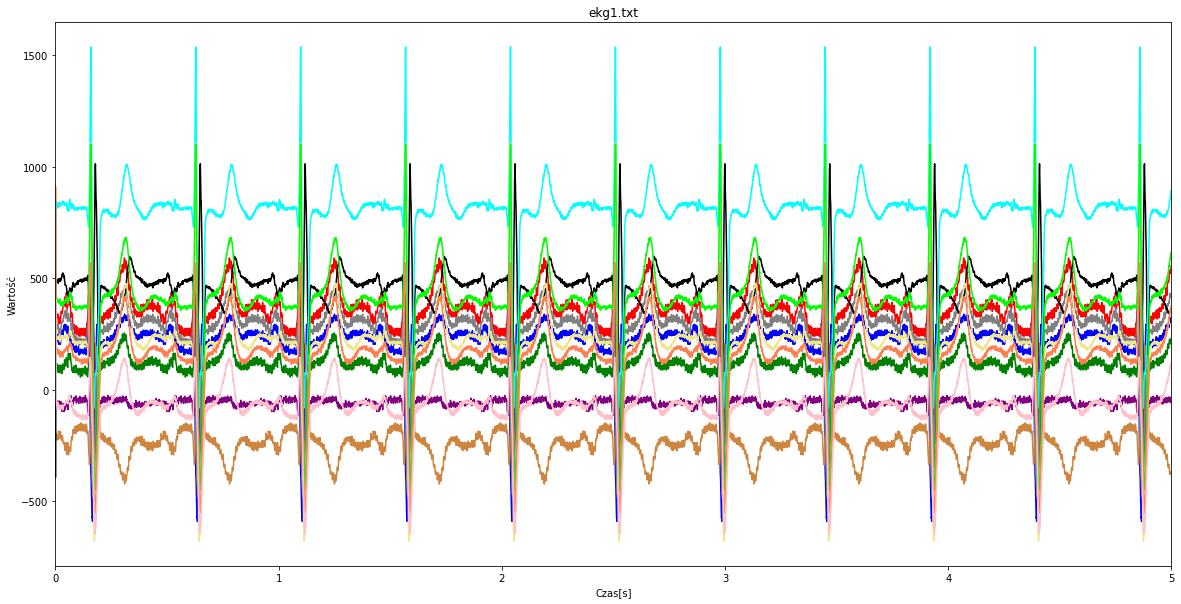

In [8]:
str1=os.getcwd()

ekg1 = pd.read_csv(str1+'\\ekg1.txt', names=['1','2','3','4','5','6','7','8','9','10','11','12'], sep=' ')
sampling_frequency_ekg1 = 1000 # czestotliwosc probkowania 
ekg1_time = ((ekg1.shape[0])/sampling_frequency_ekg1)
ekg1['Czas'] = ekg1.index/sampling_frequency_ekg1 # ustalenie punktów na osi czasu
ekg1 = ekg1.set_index('Czas')

plt.figure(figsize=(20,10))
plt.plot(ekg1.index, ekg1['1'], color='green')
plt.plot(ekg1.index, ekg1['2'], color='red')
plt.plot(ekg1.index, ekg1['3'], color='blue')
plt.plot(ekg1.index, ekg1['4'], color='peru')
plt.plot(ekg1.index, ekg1['5'], color='purple')
plt.plot(ekg1.index, ekg1['6'], color='gray')
plt.plot(ekg1.index, ekg1['7'], color='black')
plt.plot(ekg1.index, ekg1['8'], color='cyan')
plt.plot(ekg1.index, ekg1['9'], color='khaki')
plt.plot(ekg1.index, ekg1['10'], color='lime')
plt.plot(ekg1.index, ekg1['11'], color='coral')
plt.plot(ekg1.index, ekg1['12'], color='pink')
plt.title('ekg1.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0,ekg1_time)
# file_name = input("Podaj nazwe pliku do zapisu: ")
# plt.savefig(file_name + ".jpg")
plt.show()

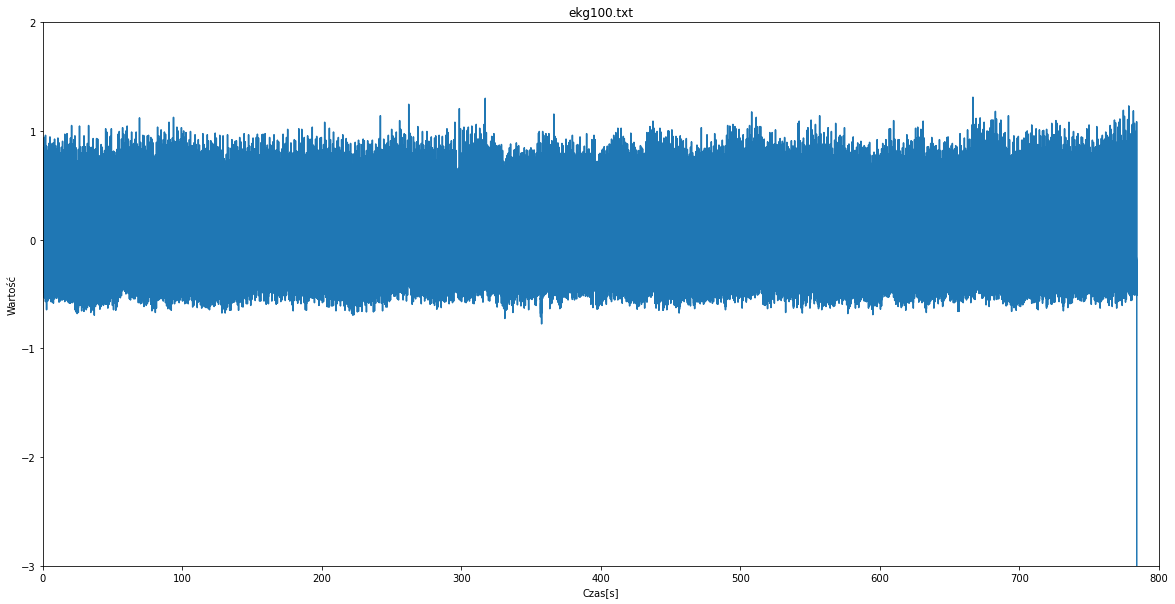

In [9]:
str1=os.getcwd()

ekg100 = pd.read_csv(str1+'\\ekg100.txt', names=['1'])
sampling_frequency_ekg100 = 360 # czestotliwosc probkowania  

ekg100['Czas'] = ekg100.index/sampling_frequency_ekg100 # ustalenie punktów na osi czasu
ekg100 = ekg100.set_index('Czas') # ustawienie czasu jako indexu tabeli

plt.figure(figsize=(20,10))
plt.plot(ekg100.index, ekg100['1'])
plt.title('ekg100.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0,800)
plt.ylim(-3,2.0)
# file_name = input("Podaj nazwe pliku do zapisu: ")
# plt.savefig(file_name + ".jpg")
plt.show()

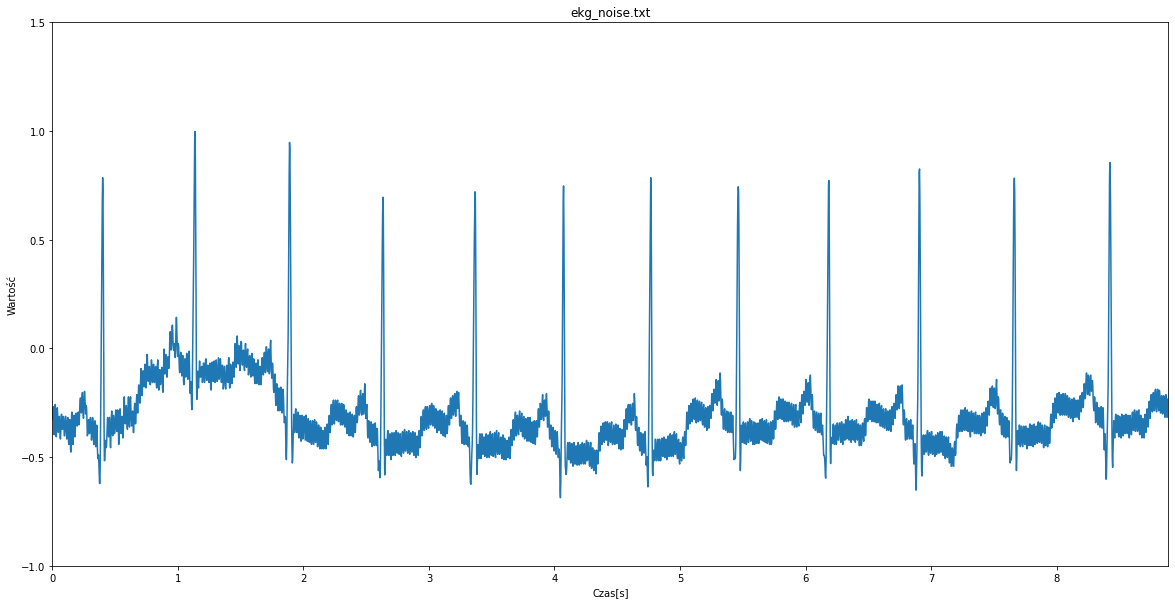

In [10]:
str1=os.getcwd()

ekg_noise = pd.read_csv(str1+'\\ekg_noise.txt', names=['Czas', 'Wartosc amplitudy'], sep='\s+')
sampling_frequency_ekg_noise = 360 # czestotliwosc probkowania  

ekg_noise['Czas'] = ekg_noise.index/sampling_frequency_ekg_noise # ustalenie punktów na osi czasu
ekg_noise = ekg_noise.set_index('Czas')
ekg_noise_time = ((ekg_noise.shape[0])/sampling_frequency_ekg_noise)

plt.figure(figsize=(20,10))
plt.plot(ekg_noise.index, ekg_noise['Wartosc amplitudy'])
plt.title('ekg_noise.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0, ekg_noise_time)
plt.ylim(-1.0,1.5)
# file_name = input("Podaj nazwe pliku do zapisu: ")
# plt.savefig(file_name + ".jpg")
plt.show()

#### Ćwiczenie 2.
1)

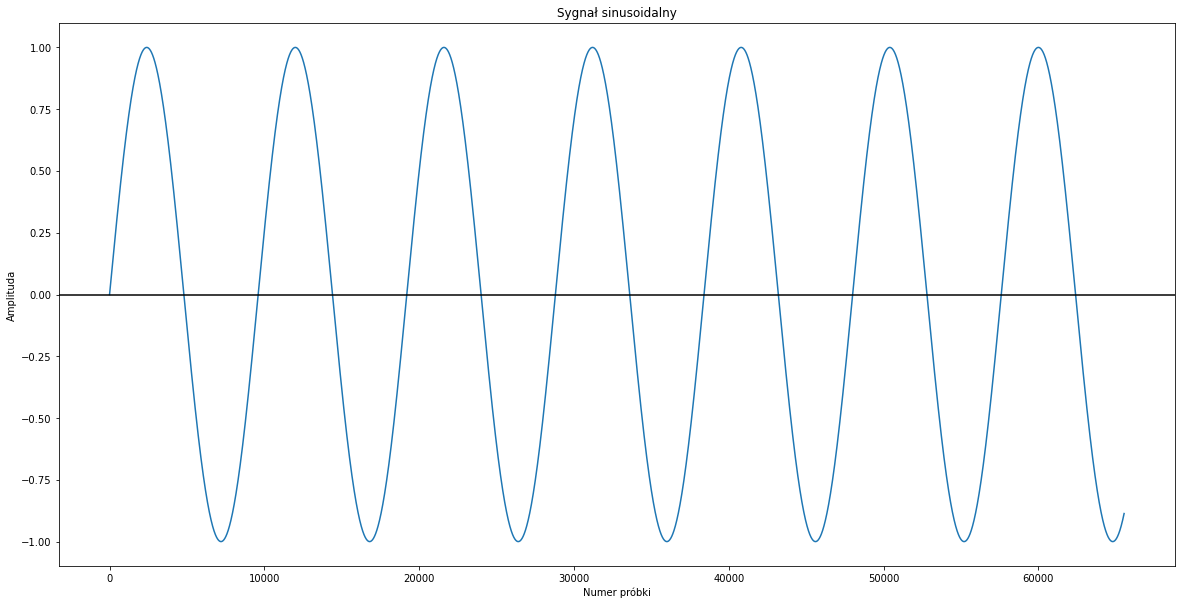

In [11]:
f = 50
length = 65_536
N = np.arange(length)
fs = 480_000

sinus = np.sin(2 * N * np.pi * f/fs) #sin(2 * pi * f * t), t = 1/fs

plt.figure(figsize=(20,10))
plt.plot(N, sinus)
plt.title('Sygnał sinusoidalny')
plt.ylabel('Amplituda')
plt.xlabel('Numer próbki')
plt.axhline(y=0, color='black')
plt.show()

2)

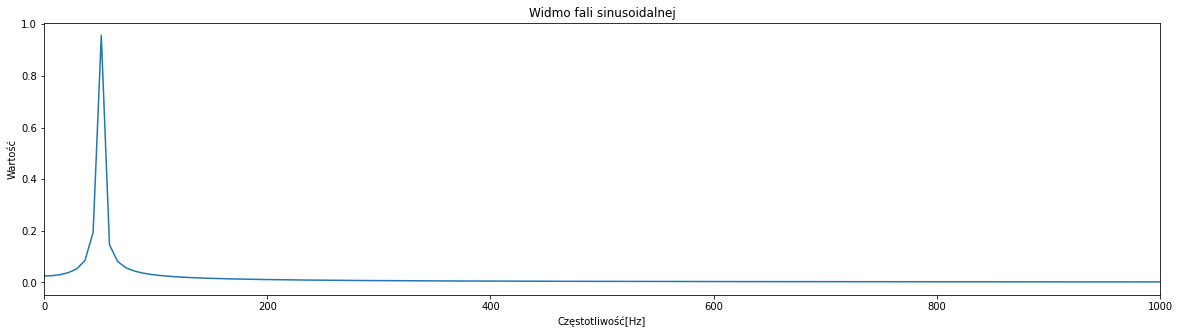

In [12]:
widmo = np.abs(np.fft.rfft(sinus)) / (length/2)
f = np.fft.rfftfreq(length, 1/fs) 

plt.figure(figsize=(20,5))
plt.plot(f, widmo)
plt.title('Widmo fali sinusoidalnej')
plt.ylabel('Wartość')
plt.xlabel('Częstotliwość[Hz]')
plt.xlim(0,sampling_frequency_ekg1)
plt.show()

3)

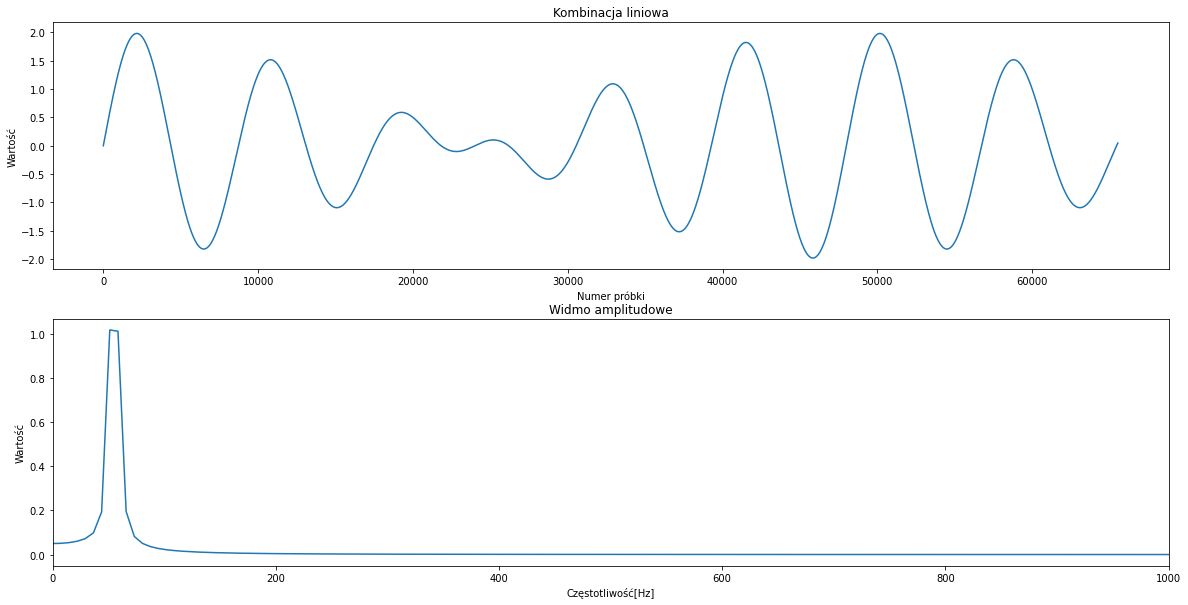

In [13]:
f1 = 50 # ustawienie częstotliwości 50 Hz
f2 = 60 # ustawienie częstotliwości 60 Hz
fs = 480_000

N = np.arange(length) 

y1 = np.sin(2 * np.pi * N * f1/fs) 
y2 = np.sin(2 * np.pi * N * f2/fs) 

widmo = np.abs(np.fft.rfft(y1 + y2)) / (length/2)

plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1) 
plt.plot(N,y1 + y2)
plt.title('Kombinacja liniowa')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość')

plt.subplot(2, 1, 2) 
plt.plot(f, widmo)
plt.xlim(0, 1000)
plt.title('Widmo amplitudowe')
plt.xlabel('Częstotliwość[Hz]')
plt.ylabel('Wartość')

plt.show()

4)

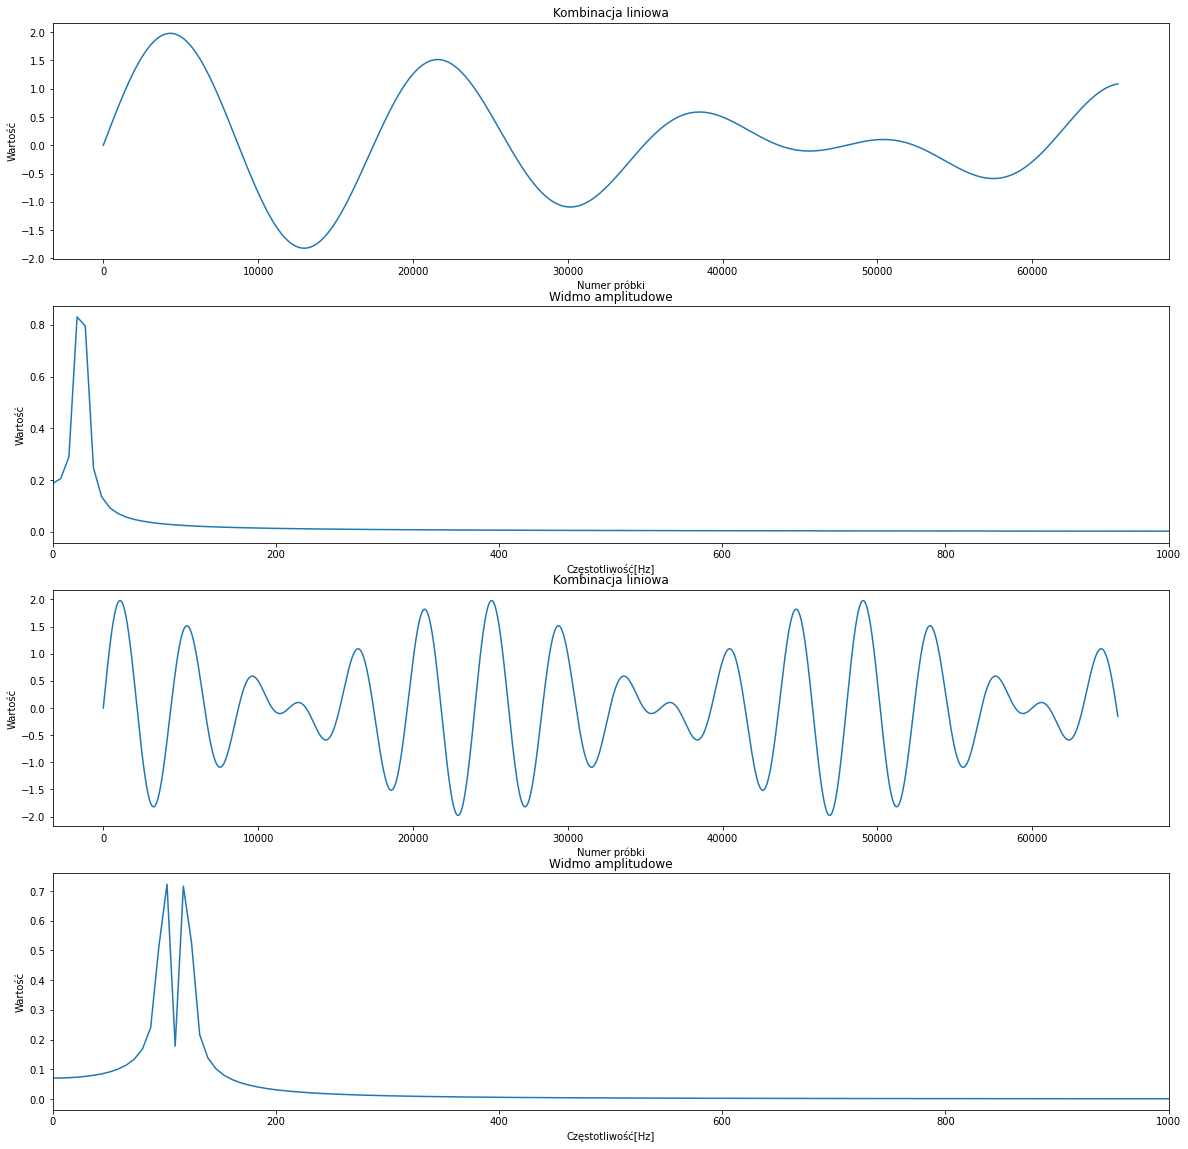

In [14]:
fs = 960_000
N = np.arange(length) 

y1 = np.sin(2 * np.pi * N * f1/fs) 
y2 = np.sin(2 * np.pi * N * f2/fs) 

widmo = np.abs(np.fft.rfft(y1 + y2)) / (length/2)

plt.figure(figsize=(20,20))

plt.subplot(4, 1, 1) 
plt.plot(N,y1 + y2)
plt.title('Kombinacja liniowa')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość')

plt.subplot(4, 1, 2) 
plt.plot(f, widmo)
plt.xlim(0, 1000)
plt.title('Widmo amplitudowe')
plt.xlabel('Częstotliwość[Hz]')
plt.ylabel('Wartość')

fs = 240_000
N = np.arange(length) 

y1 = np.sin(2 * np.pi * N * f1/fs) 
y2 = np.sin(2 * np.pi * N * f2/fs) 

widmo = np.abs(np.fft.rfft(y1 + y2)) / (length/2)

plt.subplot(4, 1, 3) 
plt.plot(N,y1 + y2)
plt.title('Kombinacja liniowa')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość')

plt.subplot(4, 1, 4) 
plt.plot(f, widmo)
plt.xlim(0, 1000)
plt.title('Widmo amplitudowe')
plt.xlabel('Częstotliwość[Hz]')
plt.ylabel('Wartość')

plt.show()

#### Ćwiczenie 3.
1)

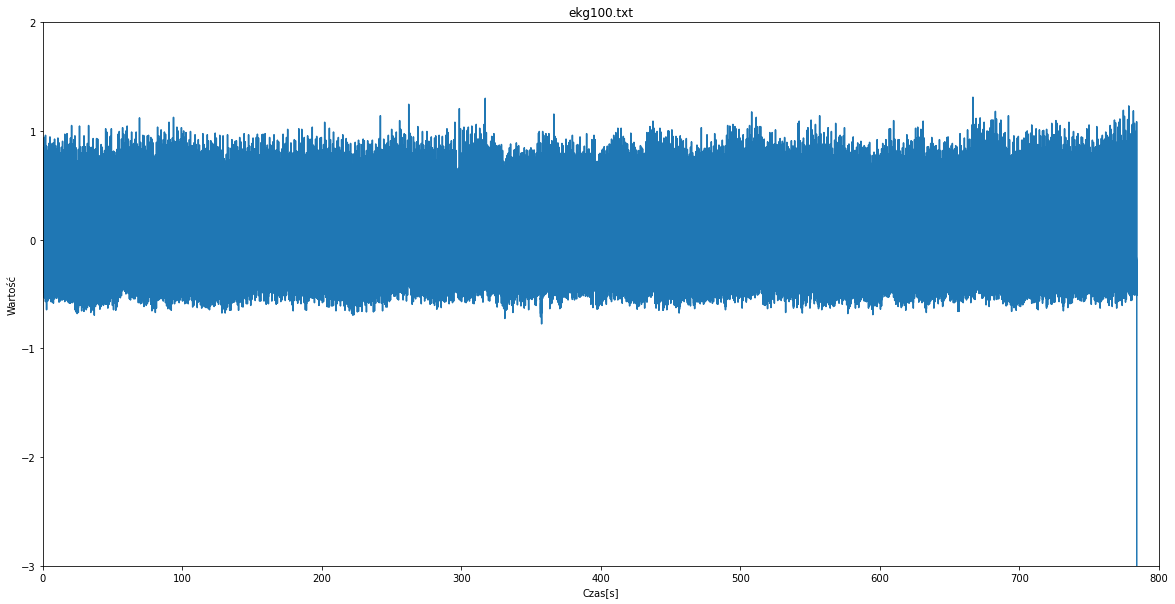

In [15]:
str1=os.getcwd()

ekg100 = pd.read_csv(str1+'\\ekg100.txt', names=['1'])
sampling_frequency_ekg100 = 360 # czestotliwosc probkowania  

ekg100['Czas'] = ekg100.index/sampling_frequency_ekg100 # ustalenie punktów na osi czasu
ekg100 = ekg100.set_index('Czas')

plt.figure(figsize=(20,10))
plt.plot(ekg100.index, ekg100['1'])
plt.title('ekg100.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0,800)
plt.ylim(-3,2.0)
plt.show()

2)

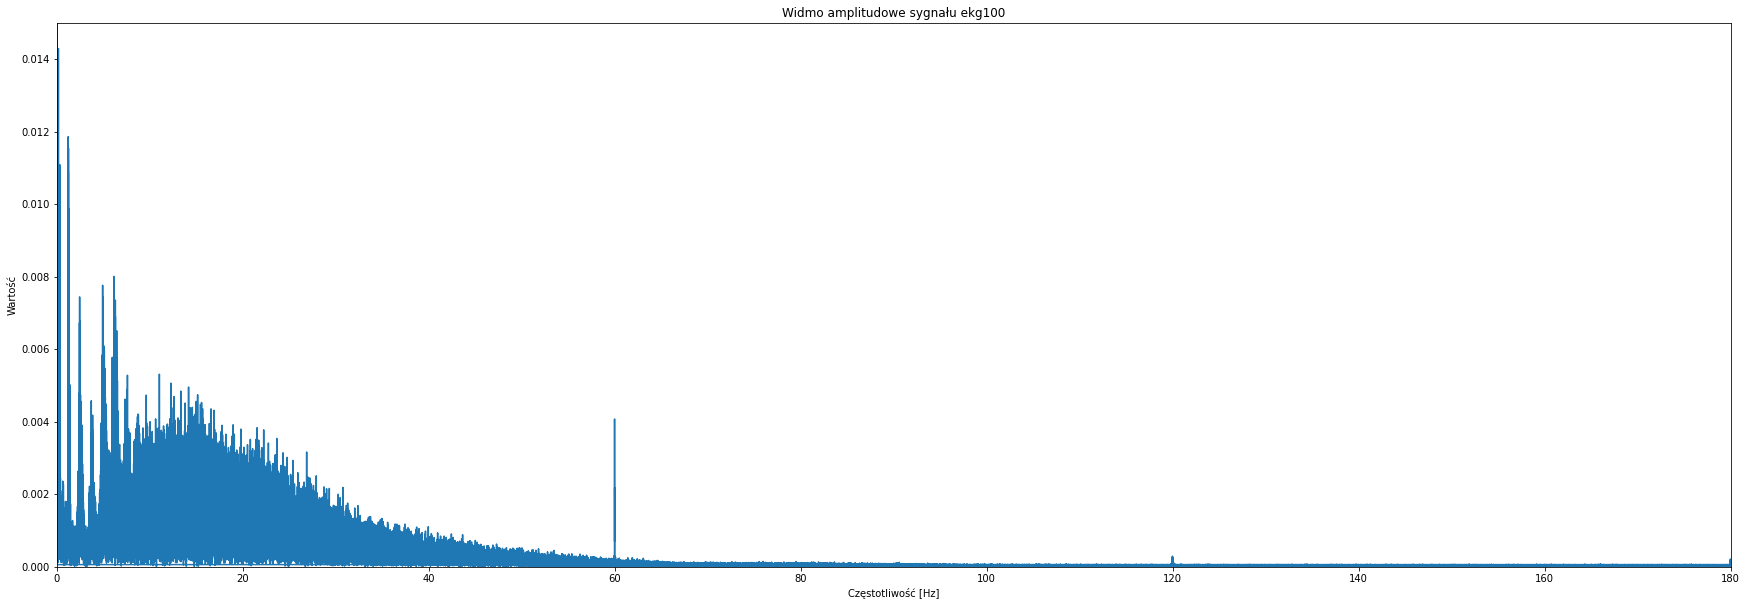

In [16]:
x = np.fft.fftfreq(ekg100.size, 1/sampling_frequency_ekg100)
y = np.abs(np.fft.fft(ekg100['1']))/(ekg100.size//2)

plt.figure(figsize=(30,10))
plt.plot(x, y)
plt.xlim(0,sampling_frequency_ekg100/2)
plt.ylim(0,0.015)
plt.title('Widmo amplitudowe sygnału ekg100')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Wartość')
plt.show()